# Advent of Code 2024

In [1]:
import re
import time
import itertools
import numpy as np
from tqdm import tqdm
from collections import defaultdict

## Day 1

In [2]:
with open('data/day1.txt') as f:
    lines = f.read().splitlines() 

# Format into two lists
list1 = []
list2 = []
for line in lines:
    a, b = line.split("   ")
    list1.append(int(a))
    list2.append(int(b))

# Sort lists in ascending order
list1 = sorted(list1)
list2 = sorted(list2)

distance = 0
for a, b in zip(list1, list2):
    distance += abs(a - b)

print(f"Part 1 answer is {distance}")

similarity = 0
for a in list1:
    # Count occurences of a in list2 then multiply by a
    similarity += a*len([i for i, x in enumerate(list2) if x == a])

print(f"Part 2 answer is {similarity}")

Part 1 answer is 1660292
Part 2 answer is 22776016


## Day 2

In [3]:
def is_safe(line):
    line = np.array([int(l) for l in line])
    diff = line[1:] - line[:-1]

    # disqualified if any diff is < 1 or > 3
    if (np.sum(np.abs(diff) > 3) == 0) and (np.sum(np.abs(diff) < 1) == 0):
        # disqualified if not all ascending or all descending
        if (np.sum(diff > 0) == 0) or (np.sum(diff < 0) == 0):
            return True
    else:
        return False

with open('data/day2.txt') as f:
    lines = f.read().splitlines()

lines = [l.split(" ") for l in lines]

# Part 1
safe = 0
for line in lines:
    if is_safe(line):
        safe += 1

print(f"Part 1 answer is {safe}")

# Part 2
safe = 0
for line in lines:
    for i in range(len(line)):
        # Just be lazy and make lots of copies of the list with a different item removed each time
        newline = line.copy()
        newline.pop(i)
        # If removing an item ever makes the list safe, it's safe
        if is_safe(newline):
            safe += 1
            break

print(f"Part 2 answer is {safe}")

Part 1 answer is 524
Part 2 answer is 569


## Day 3

In [4]:
with open('data/day3.txt') as f:
    line = f.read()

# Extract all strings matching the pattern + capture groups
patterns = re.findall(r"mul\((\d{1,3}),(\d{1,3})\)", line)

total = 0
for pattern in patterns:
    total += int(pattern[0])*int(pattern[1])

print(f"Part 1 answer is {total}")

# Part 2
patterns = re.findall(r"(mul\((\d{1,3}),(\d{1,3})\)|do\(\)|don't\(\))", line)

do = True
total = 0
for pattern in patterns:
    if pattern[0] == "don't()":
        do = False
    elif pattern[0] == "do()":
        do = True
    else:
        if do:
            total += int(pattern[1])*int(pattern[2])

print(f"Part 2 answer is {total}")

Part 1 answer is 170778545
Part 2 answer is 82868252


## Day 4

In [5]:
def count_string_in_array(line, string="XMAS"):
    # Turn it back into a string
    line = "".join(line)
    return len(re.findall(string, line))
    
with open('data/day4.txt') as f:
    lines = f.read().splitlines()

lines = [list(line) for line in lines]
lines = np.array(lines)

count = 0
# Find horizontal forwards and backwards
for line in lines:
    count += count_string_in_array(line)
    count += count_string_in_array(line[::-1])

# Vertical
for line in lines.transpose():
    count += count_string_in_array(line)
    count += count_string_in_array(line[::-1])

for i in range(-len(lines), len(lines)):
    # Diagonal one way
    line = lines.diagonal(i)
    count += count_string_in_array(line)
    count += count_string_in_array(line[::-1])
    # Diagonal the other way
    line = np.fliplr(lines).diagonal(i)
    count += count_string_in_array(line)
    count += count_string_in_array(line[::-1])

print(f"Part 1 answer is {count}")

# Find every 3x3 block
# Sliding filter convolution
count = 0
for i in range(lines.shape[0] - 2):
    for j in range(lines.shape[1] - 2):
        # Here is the 3 x 3 array
        grid = lines[i:i+3, j:j+3]
        diag1 = "".join(grid.diagonal())
        diag2 = "".join(np.fliplr(grid).diagonal())

        if (diag1 == "MAS") or (diag1 == "SAM"):
            if (diag2 == "MAS") or (diag2 == "SAM"):
                count += 1

print(f"Part 2 answer is {count}")

Part 1 answer is 2642
Part 2 answer is 1974


## Day 5

In [6]:
def is_legal(update, rule_lookup):
    legal = True
    for i, u in enumerate(update):
        before_items = update[:i]
        after_items = update[i+1:]
    
        for item in before_items:
            # It's occured before u, so check that's allowed
            if item in rule_lookup[u]["after"]:
                legal = False
                break
        for item in after_items:
            # It's occured after u, so check that's allowed
            if item in rule_lookup[u]["before"]:
                legal = False
                break

    return legal

with open('data/day5example.txt') as f:
    line = f.read()

rules, updates = line.split("\n\n")
rules = rules.split("\n")
updates = updates.split("\n")

rule_lookup = {}
for rule in rules:
    before, after = rule.split("|")
    before = int(before)
    after = int(after)
    
    if before not in rule_lookup:
        rule_lookup[before] = {
            "before": [],
            "after": []
        }
    rule_lookup[before]["after"].append(after)

    if after not in rule_lookup:
        rule_lookup[after] = {
            "before": [],
            "after": []
        }
    rule_lookup[after]["before"].append(before)

# I know this is a messy solution
answer = 0
for update in updates:
    update = update.split(",")
    update = [int(u) for u in update]

    # Check ordering correct
    if is_legal(update, rule_lookup):
        answer += update[int(len(update)/2)]

print(f"Part 1 answer is {answer}")


Part 1 answer is 143


In [7]:
def make_fix(update, rule_lookup):
    # Find a single broken rule and swap the two items involved
    for i, u in enumerate(update):
        before_items = update[:i]
        after_items = update[i+1:]
    
        for item in before_items:
            # It's occured before u, so check that's allowed
            if item in rule_lookup[u]["after"]:
                # if illegal, swap the two numbers
                update[update.index(item)] = u
                update[i] = item
                return False, update
        for item in after_items:
            # It's occured after u, so check that's allowed
            if item in rule_lookup[u]["before"]:
                # if illegal, swap the two numbers
                update[update.index(item)] = u
                update[i] = item
                return False, update

    # if nothing has been swapped, return None
    return True, update

answer = 0
for update in updates:
    update = update.split(",")
    update = [int(u) for u in update]

    # If the ordering is wrong...
    if not is_legal(update, rule_lookup):
        # Then go through update and swap the first two numbers which are wrong
        # Repeat until all numbers are right
        fixed = False
        while not fixed:
            fixed, update = make_fix(update, rule_lookup)

        answer += update[int(len(update)/2)]
        
print(f"Part 2 answer is {answer}")

Part 2 answer is 123


## Day 6

In [9]:
directions = {
    "^": np.array([-1, 0]),
    ">": np.array([0, 1]),
    "v": np.array([1, 0]),
    "<": np.array([0, -1])
}

directions_order = ["^", ">", "v", "<"]

def make_grid(lines):
    # Set up the grid
    grid = np.array([list(l) for l in lines])
    guard_location = np.array([np.where(grid == "^")[0][0], np.where(grid == "^")[1][0]])
    guard = Guard(location=guard_location, direction="^")
    return grid, guard


class Guard:
    def __init__(self, location, direction):
        self.location = location
        # In the format e.g. [-1, 0] means up one
        self.direction = direction

    def move(self, grid):
        # Where does the guard want to move to?
        target = self.location + directions[self.direction]

        # Check end condition
        if (target[0] < 0) or (target[0] >= grid.shape[0]) or (target[1] < 0) or (target[1] >= grid.shape[1]):
            return 1


        # If not end condition, check what is in the target square
        # If empty, move
        if grid[target[0], target[1]] not in ["#", "O"]:
            self.location = target
        else:
            self.direction = self.turn(self.direction)
        return 0

    def turn(self, direction):
        new_direction = directions_order[(directions_order.index(direction) + 1) % 4]
        return new_direction
        
with open('data/day6.txt') as f:
    lines = f.read().splitlines()

# Set up the grid
grid, guard = make_grid(lines)

state = 0
while state == 0:
    state = guard.move(grid)

    # Now update the grid
    grid[guard.location[0], guard.location[1]] = guard.direction

sumup = 0
for direction in directions:
    sumup += np.sum(grid == direction)

    
print(f"Part 1 answer is {sumup}")

# Set up the grid again
grid, guard = make_grid(lines)

# We try putting a blockage at every element of the grid
obstruction_locations = []
for i in tqdm(range(grid.shape[0])):
    for j in range(grid.shape[1]):
        # Set up the grid again
        test_grid, guard = make_grid(lines)
        test_grid[i, j] = "O"

        counter = 1
        old_sumup = 1
        resolved = False
        while not resolved:
            state = guard.move(test_grid)
            if state == 1:
                resolved = True
            else:
                # Check if we have reached a loop
                if test_grid[guard.location[0], guard.location[1]] == guard.direction:
                    resolved = True
                    obstruction_locations.append([i, j])
                # Update the grid
                test_grid[guard.location[0], guard.location[1]] = guard.direction

            # We have also reached a loop if we have not marked a new square in 10000 iterations
            # Know this is messy but I have an infinite loop bug I can't figure out..
            if counter % 10000 == 0:
                sumup = 0
                for direction in directions:
                    sumup += np.sum(test_grid == direction)
        
                if sumup == old_sumup:
                    resolved = True
                    obstruction_locations.append([i, j])
                old_sumup = sumup
            counter += 1
print(f"Part 2 answer is {len(obstruction_locations)}")

Part 1 answer is 5404


100%|███████████████████████████████████████████████| 130/130 [03:15<00:00,  1.51s/it]

Part 2 answer is 1984


## Day 7

In [530]:
with open('data/day7example.txt') as f:
    lines = f.read().splitlines()

# Part 1
answer_list = []
number_list = []
for line in lines:
    answer, line = line.split(": ")
    numbers = line.split(" ")

    answer_list.append(int(answer))
    number_list.append([int(num) for num in numbers])
    
summed_answer = 0
for answer, numbers in zip(answer_list, number_list):
    # Get all possible arrangements of + and * given number of operators
    combinations = list(itertools.product(["*", "+"], repeat=(len(numbers)-1)))
    
    for operators in combinations:
        sumup = numbers[0]
        for num, operator in zip(numbers[1:], operators):
            if operator == "+":
                sumup += num
            elif operator == "*":
                sumup *= num
        if sumup == answer:
            summed_answer += answer
            break

print(f"Part 1 answer is {summed_answer}")

# Got lucky here because trivial to reuse part 1 solution
summed_answer = 0
for answer, numbers in zip(answer_list, number_list):
    combinations = list(itertools.product(["*", "+", "|"], repeat=(len(numbers)-1)))
    
    for operators in combinations:
        sumup = numbers[0]
        for num, operator in zip(numbers[1:], operators):
            if operator == "+":
                sumup += num
            elif operator == "*":
                sumup *= num
            elif operator == "|":
                sumup = int(str(sumup) + str(num))

        if sumup == answer:
            summed_answer += answer
            break

print(f"Part 2 answer is {summed_answer}")


Part 1 answer is 3312271365652
Part 2 answer is 509463489296712


## Day 8

In [ ]:
def get_coordinates_of_item_in_grid(grid, item):
    locations = np.where(grid==item)
    coordinates = []
    for x, y in zip(locations[0], locations[1]):
        coordinates.append([x, y])
    return np.array(coordinates)

def print_grid(grid):
    if grid.dtype == "float64":
        for line in grid:
            newline = ""
            for i in line:
                if i == 0:
                    newline += "."
                elif i == 1:
                    newline += "#"
            print(newline)
    else:
        for line in grid:
            print("".join(line))

def in_grid(grid, location):
    if (location[0] < 0) or (location[0] >= grid.shape[0]) or (location[1] < 0) or (location[1] >= grid.shape[1]):
        return False
    else:
        return True

with open('data/day8.txt') as f:
    lines = f.read().splitlines()

grid = np.array([list(l) for l in lines])
# Set up empty grid to store the antinodes in
antinode_grid = np.zeros([grid.shape[0], grid.shape[1]])

# What signals exist?
unique = list(np.unique(grid))
unique.remove(".")

for signal in unique:
    # I think we need the relationship between every possible pair
    # Relationship can be represented as a vector
    # We need starting point and direction
    signal_coordinates = get_coordinates_of_item_in_grid(grid, signal)

    # For each pair....
    antinode_vectors = []
    for i, coordinate1 in enumerate(signal_coordinates):
        for j, coordinate2 in enumerate(signal_coordinates):
            if i == j:
                pass
            else:
                position = coordinate1
                direction = coordinate2 - coordinate1
                antinode_vectors.append([position, direction])

    # Now as for where the antinode actually is, there are two potential antinodes per antinode_vector
    # These are position - direction and postion + direction*2
    potential_antinode_locations = []
    for vector in antinode_vectors:
        position = vector[0]
        direction = vector[1]
        potential_antinode_locations.append(position - direction)
        potential_antinode_locations.append(position + direction*2)

    # Now, some of these locations are not actually reasonable
    # This is because they are off the edge of the map
    for location in potential_antinode_locations:
        if in_grid(grid, location):
            antinode_grid[location[0], location[1]] = 1

print(f"Part 1 answer is {int(np.sum(antinode_grid))}")


In [ ]:
# Part 2 is very similar, only we do not stop adding antinodes

grid = np.array([list(l) for l in lines])
# Set up empty grid to store the antinodes in
antinode_grid = np.zeros([grid.shape[0], grid.shape[1]])

# What signals exist?
unique = list(np.unique(grid))
unique.remove(".")

for signal in unique:
    # I think we need the relationship between every possible pair
    # Relationship can be represented as a vector
    # We need starting point and direction
    signal_coordinates = get_coordinates_of_item_in_grid(grid, signal)

    # For each pair....
    antinode_vectors = []
    for i, coordinate1 in enumerate(signal_coordinates):
        for j, coordinate2 in enumerate(signal_coordinates):
            if i == j:
                pass
            else:
                position = coordinate1
                direction = coordinate2 - coordinate1
                antinode_vectors.append([position, direction])

    # Now as for where the antinode actually is, there are two potential antinodes per antinode_vector
    # These are position - direction and postion + direction*2
    potential_antinode_locations = []
    for vector in antinode_vectors:
        position = vector[0]
        direction = vector[1]

        # Every antenna is an antinode
        antinode_grid[position[0], position[1]] = 1
        
        # Deal with backward antinodes
        # Add backward antinodes until illegal
        inside_grid = True
        n = 1
        while inside_grid:
            location = position - n*direction
            if in_grid(grid, location):
                antinode_grid[location[0], location[1]] = 1
                n += 1
            else:
                inside_grid = False

        # Deal with forward antinodes
        n = 2
        while inside_grid:
            location = position + n*direction
            if in_grid(grid, location):
                antinode_grid[location[0], location[1]] = 1
                n += 1
            else:
                inside_grid = False


print(f"Part 2 answer is {int(np.sum(antinode_grid))}")

## Day 9

In [428]:
def check_complete(disk):
    # Find the number of -1s in the array
    free_blocks = len(np.where(disk == -1)[0])
    
    # Check all occur at the end
    # Last part of array should sum to -1 * number of free_blocks
    if sum(disk[-free_blocks:]) == -free_blocks:
        return True
    else:
        return False

def calculate_checksum(disk):
    checksum = 0
    for i, file_id in enumerate(disk):
        if file_id != -1:
            checksum += i*file_id

    return checksum
    
with open('data/day9example.txt') as f:
    line = f.read()

disk = []
file_id = 0
for i, l in enumerate(line):
    # even numbers are file sizes
    if i % 2 == 0:
        disk += [file_id]*int(l)
        file_id += 1
    else:
        disk += [-1]*int(l)

disk = np.array(disk)

# Rightmost number moves
while not check_complete(disk):
    # Find the index of the last item which is not -1
    last_file = np.where(disk!=-1)[0][-1]

    # Find where it should move
    first_gap = np.where(disk==-1)[0][0]

    disk[first_gap] = disk[last_file]
    disk[last_file] = -1

print(f"Part 1 answer is {calculate_checksum(disk)}")

Part 1 answer is 6301895872542


In [529]:
def identify_all_block(disk):
    last_file_id = disk[np.where(disk!=-1)[0][-1]]
    block = np.where(disk==last_file_id)[0]
    return last_file_id, block

def get_empty_blocks(disk):
    empty = np.where(disk == -1)[0]
    empty_blocks = []
    
    start_item = empty[0]
    block_size = 1
    for i, item in enumerate(empty[1:]):
        # Check if contiguous
        if item == empty[i] + 1:
            block_size += 1
        # If not contiguous, close off this block and start a new onw
        else:
            empty_blocks.append([start_item, block_size])
            start_item = item
            block_size = 1
    return empty_blocks

with open('data/day9.txt') as f:
    line = f.read()

disk = []
file_id = 0
blocks = []
for i, l in enumerate(line):
    # even numbers are file sizes
    if i % 2 == 0:
        blocks.append([len(disk), int(l), file_id])
        disk += [file_id]*int(l)
        file_id += 1
    else:
        disk += [-1]*int(l)

disk = np.array(disk)

blocks.reverse()
for block in blocks[:-1]:
    start_id, block_size, file_id = block
    
    # Find the first gap which will fit the file
    empty_blocks = get_empty_blocks(disk)
    for empty in empty_blocks:
        empty_start_id, empty_block_size = empty
        if (empty_block_size >= block_size) and (empty_start_id < start_id):
            disk[empty_start_id:empty_start_id+block_size] = file_id 
            disk[start_id:start_id+block_size] = -1
            break

print(f"Part 2 answer is {calculate_checksum(disk)}")

Part 1 answer is 6323761685944


## Day 10

First recursion

In [95]:
def in_grid(grid, location):
    if (location[0] < 0) or (location[0] >= grid.shape[0]) or (location[1] < 0) or (location[1] >= grid.shape[1]):
        return False
    else:
        return True

def search(location, count, visited):
    # Check terminate condition
    if int(grid[location[0], location[1]]) == 9:
        visited.append((location[0], location[1]))
        return count + 1, visited
        
    options = [
        [location[0]-1, location[1]],
        [location[0]+1, location[1]],
        [location[0], location[1]-1], 
        [location[0], location[1]+1]
    ]

    # Check options legal
    legal_options = []
    for option in options:
        if in_grid(grid, option):
            legal_options.append(option)

    # Check options are increasing by one
    increasing_options = []
    for option in legal_options:
        if int(grid[option[0], option[1]]) == int(grid[location[0], location[1]]) + 1:
            increasing_options.append(option)

    # Now check second terminate condition
    if len(increasing_options) == 0:
        return count, visited

    for option in increasing_options:
        newcount, visited = search(option, 0, visited)
        count += newcount

    return count, visited
    
with open('data/day10.txt') as f:
    lines = f.read().splitlines()

grid = np.array([[int(l) for l in list(line)] for line in lines])

trailheads = []
counter = 0
counter_2 = 0
for x, y in zip(np.where(grid==0)[0], np.where(grid==0)[1]):
    trailheads.append([int(x), int(y)])
    count, visited = search([int(x), int(y)], 0, [])
    counter += len(set(visited))
    counter_2 += len(visited)

print(f"Part 1 answer is {counter}")
print(f"Part 2 answer is {counter_2}")

Part 1 answer is 822
Part 2 answer is 1801


## Day 11

In [46]:
def process_stone(stone):
    if stone == 0:
        return [1]
    elif len(str(stone)) % 2 == 0:
        split_point = int(len(str(stone))/2)
        return [int(str(stone)[:split_point]), int(str(stone)[split_point:])]
    else:
        return[stone*2024]

with open('data/day11.txt') as f:
    line = f.read()

stones = [int(s) for s in line.split(" ")]

for i in range(25):
    new_stones = []
    for stone in stones:
        new_stones += process_stone(stone)
    stones = new_stones.copy()

print(f"Part 1 answer is {len(stones)}")


Part 1 answer is 216042


In [44]:
iterations = 75

stones = [int(s) for s in line.split(" ")]

terminus_array = np.zeros([10, 76])
for i in range(iterations):
    new_stones = []
    for stone in stones:
        if stone < 10:
            terminus_array[stone, i] += 1
        else:
            new_stones += process_stone(stone)
    stones = new_stones.copy()

total_exemption_stones = len(stones)

# Now work out how to deal with terminus array
stone_explosion_array = np.zeros([10, 76])

for k in range(10):
    stones = [k]
    stone_array = np.zeros(36869185)
    for stone in stones:
        stone_array[stone] += 1
    
    for i in tqdm(list(range(iterations))):
        new_stone_array = np.zeros(36869185)
        for stone in np.where(stone_array != 0)[0]:
            new_stones = process_stone(stone)
            new_stones_count = stone_array[stone]
            for new_stone in new_stones:
                new_stone_array[new_stone] += new_stones_count
        
        stone_array = new_stone_array.copy()
        stone_explosion_array[k, i] = np.sum(stone_array)

total_stones = total_exemption_stones
for single_digit in range(10):
    for i in range(iterations):
        number_of_stones_at_iteration = terminus_array[single_digit, i]
        number_of_stones_at_final_iteration = number_of_stones_at_iteration*stone_explosion_array[single_digit, (iterations-1)-i]
        total_stones += number_of_stones_at_final_iteration

print(f"Part 2 answer is {int(total_stones)}")

100%|████████████████████████████████████████████████████| 75/75 [00:07<00:00, 10.12it/s]

Part 2 answer is 255758646442399


### James' Method

Based on posthoc advice from my colleague about how to do this in a more sensible way


In [63]:
t0 = time.time()
stones = [int(s) for s in line.split(" ")]
stone_dict = defaultdict(int)
for stone in stones:
    stone_dict[stone] += 1

for i in range(75):
    new_stone_dict = defaultdict(int)
    for stone in stone_dict:
        new_stones = process_stone(stone)
        for new_stone in new_stones:
            new_stone_dict[new_stone] += stone_dict[stone]

    stone_dict = new_stone_dict.copy()

print(f"Part 2 answer is {sum(stone_dict.values())}")
print(f"Completed in {time.time()-t0}")

Part 2 answer is 255758646442399
Completed in 0.14552593231201172


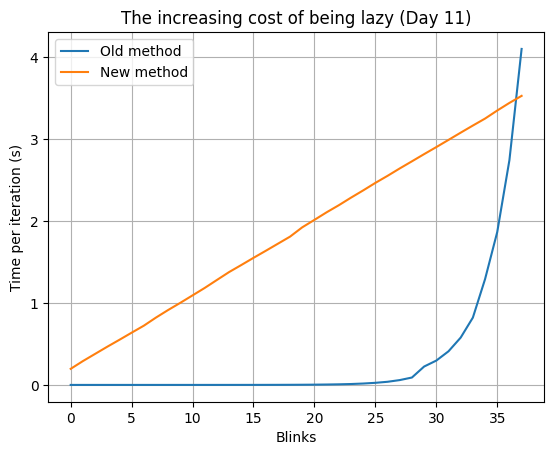

In [226]:
import matplotlib.pyplot as plt

plt.plot(range(38), time_array_old_method, label="Old method")
plt.plot(range(38), time_array_new_method, label="New method")
plt.xlabel("Blinks")
plt.ylabel("Time per iteration (s)")
plt.title("The increasing cost of being lazy (Day 11)")
plt.legend()
plt.grid()

### Measure time per iteration of different methods

In [65]:
def process_stone(stone):
    if stone == 0:
        return [1]
    elif len(str(stone)) % 2 == 0:
        split_point = int(len(str(stone))/2)
        return [int(str(stone)[:split_point]), int(str(stone)[split_point:])]
    else:
        return[stone*2024]

def method_1(stones, iterations):
    t0 = time.time()
    t_array = []
    for i in range(iterations):
        new_stones = []
        for stone in stones:
            new_stones += process_stone(stone)
        stones = new_stones.copy()
        t_array.append(time.time()-t0)
    return t_array

def method_2(stones, iterations):
    stone_array = np.zeros(36869185)
    for stone in stones:
        stone_array[stone] += 1
        
    t0 = time.time()
    t_array = []
    for i in tqdm(list(range(iterations))):
        new_stone_array = np.zeros(36869185)
        for stone in np.where(stone_array != 0)[0]:
            new_stones = process_stone(stone)
            new_stones_count = stone_array[stone]
            for new_stone in new_stones:
                new_stone_array[new_stone] += new_stones_count
        t_array.append(time.time()-t0)
    return t_array

def method_3(stones, iterations):
    t0 = time.time()
    t_array = []
    stone_dict = defaultdict(int)
    for stone in stones:
        stone_dict[stone] += 1
    
    for i in range(75):
        new_stone_dict = defaultdict(int)
        for stone in stone_dict:
            new_stones = process_stone(stone)
            for new_stone in new_stones:
                new_stone_dict[new_stone] += stone_dict[stone]
    
        stone_dict = new_stone_dict.copy()
        t_array.append(time.time()-t0)
    return t_array
    
stones = [0]
m1 = method_1(stones, 41)
m2 = method_2(stones, 41)
m3 = method_3(stones, 41)

100%|████████████████████████████████████████████████████| 41/41 [00:00<00:00, 41.58it/s]


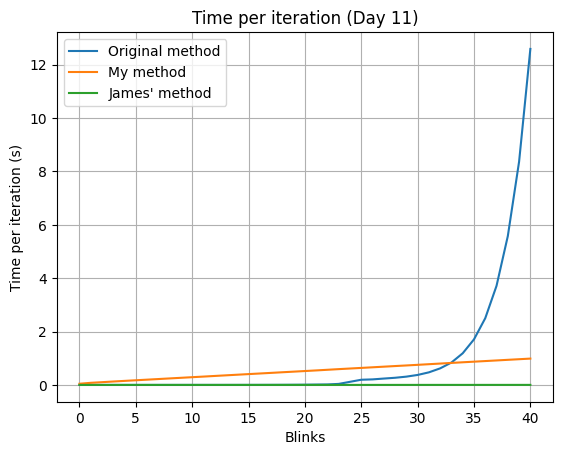

In [68]:
import matplotlib.pyplot as plt

plt.plot(range(41), m1, label="Original method")
plt.plot(range(41), m2, label="My method")
plt.plot(range(41), m3[:41], label="James' method")
plt.xlabel("Blinks")
plt.ylabel("Time per iteration (s)")
plt.title("Time per iteration (Day 11)")
plt.legend()
plt.grid()

## Day 12

In [262]:
def in_grid(grid, location):
    if (location[0] < 0) or (location[0] >= grid.shape[0]) or (location[1] < 0) or (location[1] >= grid.shape[1]):
        return False
    else:
        return True

def flood_region(grid, source, plant, counter):
    """Flood distinct regions of a grid with a unique identifier for that region"""
    grid[source[0], source[1]] = counter
    neighbors = [np.array([0, 1]), np.array([0, -1]), np.array([1, 0]), np.array([-1, 0])]
    for neighbor in neighbors:
        location = source + neighbor
        if in_grid(grid, location):
            if grid[location[0], location[1]] == plant:
                grid[location[0], location[1]] = counter
                grid = flood_region(grid, location, plant, counter)
    return grid

def is_number(str_number):
    """Some strings are actually numbers if you look hard enough"""
    try:
        int(str_number)
        return True
    except ValueError:
        return False

def measure_perimeter(grid, region):
    """
    Measure perimeter of a contiguous region on a grid

    This is based on checking each square in the region, then checking what its neighbors are
    If the neighbor is from a different region, that's an edge.
    """
    perimeter = 0
    region_cells = np.where(grid == region)
    # We go and look at every cell in the region
    for x, y in zip(region_cells[0], region_cells[1]):
        # We check ever neighbor in the region
        neighbors = [np.array([0, 1]), np.array([0, -1]), np.array([1, 0]), np.array([-1, 0])]
        for neighbor in neighbors:
            location = np.array([x, y]) + neighbor
            if in_grid(grid, location):
                if grid[location[0], location[1]] != region:
                    # If it's another region, it's a perimeter
                    perimeter += 1
            else:
                # It's a perimeter if it's the edge of the grid
                perimeter += 1

    return perimeter

def get_perimeter_coordinates(grid, region):
    """
    Get perimeter coordinates of a contiguous region on a grid

    This is based on checking each square in the region, then checking what its neighbors are
    If the neighbor is from a different region, that's an edge.

    We then use magic that I worked out on a piece of paper to translate this into 
    line segments
    """
    perimeter = 0
    perimeter_wall = []
    region_cells = np.where(grid == region)
    # We go and look at every cell in the region
    for x, y in zip(region_cells[0], region_cells[1]):
        # We check ever neighbor in the region
        neighbors = [np.array([0, 1]), np.array([0, -1]), np.array([1, 0]), np.array([-1, 0])]

        # Magic vectors created on paper which describe the perimeter vector based on which neighbor we are
        # looking at
        vector_point_1 = [np.array([x, y+1]), np.array([x, y]), np.array([x+1, y]), np.array([x, y])]
        vector_point_2 = [np.array([x+1, y+1]), np.array([x+1, y]), np.array([x+1, y+1]), np.array([x, y+1])]
        for i, neighbor in enumerate(neighbors):
            location = np.array([x, y]) + neighbor
            if in_grid(grid, location):
                if grid[location[0], location[1]] != region:
                    # If it's another region, it's a perimeter
                    perimeter += 1
                    perimeter_wall.append([vector_point_1[i], vector_point_2[i]])
            else:
                # It's a perimeter if it's the edge of the grid
                perimeter += 1
                perimeter_wall.append([vector_point_1[i], vector_point_2[i]])
    return perimeter, perimeter_wall

def to_tuple(line_segment):
    """Get the points at either end of a line segment and the direction vector between them
    Return all as tuples to allow for lazy equality statements in python
    """
    source = tuple([line_segment[0][0], line_segment[0][1]])
    destination = tuple([line_segment[1][0], line_segment[1][1]])
    direction_array = np.abs(line_segment[1] - line_segment[0])
    direction = tuple([direction_array[0], direction_array[1]])
    return source, destination, direction

def get_corners(perimeter_wall):
    """Given a set of line segments of uniform length, get all
    corners formed between them.

    Something is a corner when:
        1) two line segments touch
        2) they are going in different directions
    """
    corners = []
    for unit1 in perimeter_wall:
        # Horribly messy code which tries to represent the line segments
        unit1_source, unit1_destination, unit1_direction = to_tuple(unit1)
        for unit2 in perimeter_wall:
            unit2_source, unit2_destination, unit2_direction = to_tuple(unit2)
    
            # Check the line segments are not the same!
            if (unit1_source == unit2_source) and (unit1_destination == unit2_destination):
                pass
    
            # Check if the direction is the same
            elif unit1_direction == unit2_direction:
                # in this case, they cannot be a corner
                pass
                
            else:
                if (unit1_destination == unit2_source):
                    corners.append(unit1_destination)
                elif (unit1_source == unit2_destination):
                    corners.append(unit1_source)
                elif (unit1_source == unit2_source):
                    corners.append(unit1_source)
                elif (unit1_destination == unit2_destination):
                    corners.append(unit1_destination)

    return corners

def check_naughty_wall(perimeter_wall):
    """A horrible hack, my apologies

    Basically, find all the places where there is an internal intersection
    between two included fields. Hard to describe, but there's an example
    in the question and I've shown it on a graph below

    You can find these because there is a single point where four line 
    segments intersect
    So because I am lazy, I just find any points where 4 line segments touch
    These are the naughty walls where there are overlapping corners
    """
    naughty = 0
    tally = defaultdict(int)
    for unit in perimeter_wall:
        for point in unit:
            tally[tuple([point[0], point[1]])] += 1
    
    for key in tally:
        if tally[key] == 4:
            naughty += 1

    return naughty
    
with open('data/day12.txt') as f:
    lines = f.read().splitlines()

grid = np.array([list(line) for line in lines])
# Can store up to 6 characters
grid = grid.astype("U6")

# Create regions with unique identifiers
counter = 0
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        source = np.array([i, j])
        plant = grid[source[0], source[1]]

        # Only look at the square if it's not part of an existing region
        if not is_number(plant):
            grid = flood_region(grid, source, plant, counter)
            counter += 1

grid = grid.astype("uint16")

regions = np.unique(grid)

total = 0
for region in regions:
    perimeter = measure_perimeter(grid, region)
    area = len(np.where(grid==region)[0])
    total += perimeter*area

print(f"Part 1 answer is {total}")

total = 0
for region in regions:
    area = len(np.where(grid==region)[0])
    perimeter, perimeter_wall = get_perimeter_coordinates(grid, region)
    corners = set(get_corners(perimeter_wall))
    naughty = check_naughty_wall(perimeter_wall)
    total_corners = len(corners) + naughty
    total += total_corners*area

print(f"Part 2 answer is {total}")

Part 1 answer is 1452678
Part 2 answer is 873584


### Quick demonstration of the problem with this question

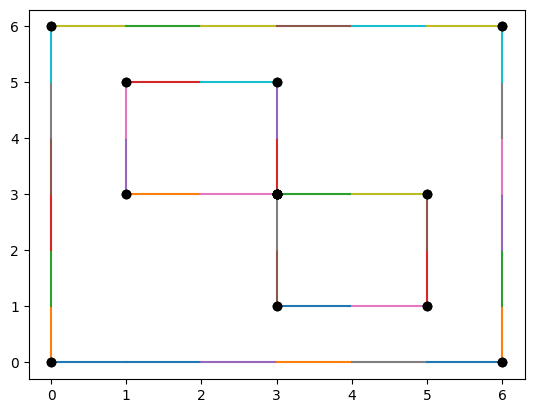

In [273]:
with open('data/day12example2.txt') as f:
    lines = f.read().splitlines()

grid = np.array([list(line) for line in lines])
# Can store up to 6 characters
grid = grid.astype("U6")

# Create regions with unique identifiers
counter = 0
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        source = np.array([i, j])
        plant = grid[source[0], source[1]]

        # Only look at the square if it's not part of an existing region
        if not is_number(plant):
            grid = flood_region(grid, source, plant, counter)
            counter += 1

grid = grid.astype("uint16")

perimeter, perimeter_wall = get_perimeter_coordinates(grid, 0)

corners = get_corners(perimeter_wall)
for unit in perimeter_wall:
    plt.plot([unit[0][0], unit[1][0]], [unit[0][1], unit[1][1]], linestyle="-")

for corner in corners:
    plt.plot(corner[0], corner[1], "ko")
    
plt.show()

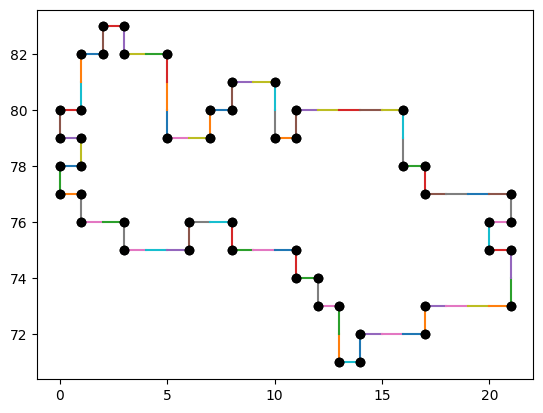

In [272]:
perimeter, perimeter_wall = get_perimeter_coordinates(grid, 9)
corners = get_corners(perimeter_wall)
for unit in perimeter_wall:
    plt.plot([unit[0][0], unit[1][0]], [unit[0][1], unit[1][1]], linestyle="-")

for corner in corners:
    plt.plot(corner[0], corner[1], "ko")

plt.show()

###### 